In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Model Development:
Based on the delay distribution, choose appropriate algorithms 
Train multiple machine learning models, such as:
Regression Models: Linear Regression, Random Forest Regression.
Classification Models: Logistic Regression, Random Forest Classifier, Gradient Boosting. Tune Hyperparameters: Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for the RandomForestClassifier.
Use metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), Accuracy, Precision, Recall, F1 Score to evaluate model performance.
Model Deployment and Evaluation:
Deploy the best performing model on a separate hold-out test data set for final real-world performance evaluation.
Analyze the model's prediction accuracy and identify potential areas for improvement.
Explore incorporating additional data sources to further enhance prediction performance.


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\final_combined_data.csv", low_memory=False)


In [4]:

df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_d

In [5]:
df.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,nfl_game,delay_columns,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest
0,monday,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,754,...,no,0.0,44.8820,-93.2218,896.0,NaN,NaN,NaN,NaN,NaN
1,monday,2023-05-01,oo,n905ev,5331,sbn,south bend,ord,chicago,460,...,no,0.0,41.9786,-87.9047,799.0,NaN,NaN,NaN,NaN,NaN
2,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,no,0.0,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
3,monday,2023-05-01,oo,n908ev,4761,psp,palm springs,lax,los angeles,524,...,no,0.0,33.9425,-118.4080,477.0,NaN,NaN,NaN,NaN,NaN
4,monday,2023-05-01,oo,n908ev,5529,lax,los angeles,rdd,redding,660,...,no,0.0,40.5090,-122.2930,125.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# create additional features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if the column is unimportant or the missing percentage is small)
df = df.dropna()  # Or you can drop specific columns with high missing data

# Impute missing values in numerical columns with median (for robustness)
df.loc[:, 'carrier_delay'] = df['carrier_delay'].fillna(df['carrier_delay'].median())
df.loc[:, 'weather_delay'] = df['weather_delay'].fillna(df['weather_delay'].median())
df.loc[:, 'nas_delay'] = df['nas_delay'].fillna(df['nas_delay'].median())
df.loc[:, 'security_delay'] = df['security_delay'].fillna(df['security_delay'].median())
df.loc[:, 'late_aircraft_delay'] = df['late_aircraft_delay'].fillna(df['late_aircraft_delay'].median())


Missing values in each column:
 day_of_week                 0
date                        0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
                       ...   
tmax_dest            12916182
tmin_dest            12916577
year                        0
month                       0
day                         0
Length: 81, dtype: int64


In [8]:
# Drop the 'tail_num' column from df
df = df.drop(columns=['tail_num'])

# If you want to modify the original DataFrame inplace, use:
# df.drop(columns=['tail_num'], inplace=True)
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_city', 'crs_dep_time',
       'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude',
       'type_of_airport', 'elevation_ft', 'municipality', 'scheduled_service',
       'unique_id', 'id', 'length_ft', 'width_ft', 'surface', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'tobs', 'iata_dest_dest', 'weath

In [9]:
# Drop the 'tail_num' column from df
df = df.drop(columns=['id', 'le_ident', 'unique_id', 'he_ident'])

# If you want to modify the original DataFrame inplace, use:
# df.drop(columns=['tail_num'], inplace=True)
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_city', 'crs_dep_time',
       'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude',
       'type_of_airport', 'elevation_ft', 'municipality', 'scheduled_service',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed',
       'le_displaced_threshold_ft', 'he_displaced_threshold_ft',
       'latitude_orig', 'longitude_orig', 'elevation_orig', 'prcp_orig',
       'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',
       'iata_dest_dest', 'weather_indicator', 'airport_indicator',
       

In [10]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime if it's not already



In [11]:
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

In [12]:
# Impute missing values in categorical columns with the mode (most frequent value)
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode()[0])
df['op_unique_carrier'] = df['op_unique_carrier'].fillna(df['op_unique_carrier'].mode()[0])


In [13]:
# Add time-based features like is_weekend, is_morning, is_afternoon, etc.
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Saturday = 5, Sunday = 6

# Ensure dep_time is in datetime format if it's not already
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')

# Extract the hour component from dep_time for comparison
df['dep_hour'] = df['dep_time'].dt.hour

# Create time-based features based on dep_hour
df['is_morning'] = (df['dep_hour'] < 12).astype(int)  # Flights before 12pm
df['is_afternoon'] = ((df['dep_hour'] >= 12) & (df['dep_hour'] < 18)).astype(int)
df['is_evening'] = (df['dep_hour'] >= 18).astype(int)


In [14]:
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], errors='coerce')

# Applying the function
df['delay_in_min'] = (df['arr_time'] - df['crs_arr_time']).dt.total_seconds() / 60.0
df['delay_in_min'] = df['delay_in_min'].apply(lambda x: round(x, 2) if x > 0 else 0)

# Display the result
print(df['delay_in_min'].head())


3042109    0.0
3042111    0.0
3042113    0.0
3042115    0.0
3042117    0.0
Name: delay_in_min, dtype: float64


In [15]:
# Filter the DataFrame to show rows where 'delay_in_min' is not zero
non_zero_delays = df[df['delay_in_min'] != 0]

# Display the first few rows of the filtered DataFrame
print(non_zero_delays.head())


Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, origin_latitude, origin_longitude, dest_latitude, dest_longitude, type_of_airport, elevation_ft, municipality, scheduled_service, length_ft, width_ft, surface, lighted, closed, le_displaced_threshold_ft, he_displaced_threshold_ft, latitude_orig, longitude_orig, elevation_orig, prcp_orig, snow_orig, snwd_orig, tmax_orig, tmin_orig, tobs, iata_dest_dest, weather_indicator, airport_indicator, total_delay_time, is_weekend, arrival_delay, departure_delay, airline_name, eras_tour, nfl_game, delay_columns, latitude_dest, longitude_dest, elevation_dest, prcp_dest, snow_dest, snwd_dest, t

Feature Engineering:
Created new features like:
is_weekend: A binary feature indicating whether the flight is on the weekend (Saturday or Sunday).
dep_time: Converted to a datetime object, and the hour (dep_hour) has been extracted.
is_morning, is_afternoon, and is_evening: These features are based on the departure time (dep_hour) and help categorize the flights based on the time of day.

In [17]:
# Impute with the median or a placeholder value
df['tmax_dest'] = df['tmax_dest'].fillna(df['tmax_dest'].median())
df['tmin_dest'] = df['tmin_dest'].fillna(df['tmin_dest'].median())


In [18]:
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df = df.dropna(subset=['dep_time'])  # Drop rows where 'dep_time' is missing


In [19]:
df.shape

(92, 81)

In [20]:
df.head()

,day_of_week,date,op_unique_carrier,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,dep_time,...,tmax_dest,tmin_dest,year,month,day,dep_hour,is_morning,is_afternoon,is_evening,delay_in_min
3042109,4,2023-07-14,oo,5273,den,denver,mso,missoula,886,1970-01-01 00:00:00.000000884,...,86.0,53.0,2023,7,14,0,1,0,0,0.0
3042111,4,2023-07-14,oo,5273,den,denver,mso,missoula,886,1970-01-01 00:00:00.000000884,...,86.0,53.0,2023,7,14,0,1,0,0,0.0
3042113,4,2023-07-14,oo,5273,den,denver,mso,missoula,886,1970-01-01 00:00:00.000000884,...,86.0,53.0,2023,7,14,0,1,0,0,0.0
3042115,4,2023-07-14,oo,5273,den,denver,mso,missoula,886,1970-01-01 00:00:00.000000884,...,86.0,53.0,2023,7,14,0,1,0,0,0.0
3042117,4,2023-07-14,oo,5273,den,denver,mso,missoula,886,1970-01-01 00:00:00.000000884,...,86.0,53.0,2023,7,14,0,1,0,0,0.0


In [21]:
# Handle Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_city', 'crs_dep_time',
       'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude',
       'type_of_airport', 'elevation_ft', 'municipality', 'scheduled_service',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed',
       'le_displaced_threshold_ft', 'he_displaced_threshold_ft',
       'latitude_orig', 'longitude_orig', 'elevation_orig', 'prcp_orig',
       'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',
       'iata_dest_dest', 'weather_indicator', 'airport_indicator',
       

In [23]:

# Frequency Encoding for 'op_unique_carrier'
frequency_encoding = df['op_unique_carrier'].value_counts() / len(df)
df['op_unique_carrier'] = df['op_unique_carrier'].map(frequency_encoding)




In [24]:
df.shape

(92, 81)

In [25]:
df.columns


Index(['day_of_week', 'date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_city', 'crs_dep_time',
       'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude',
       'type_of_airport', 'elevation_ft', 'municipality', 'scheduled_service',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed',
       'le_displaced_threshold_ft', 'he_displaced_threshold_ft',
       'latitude_orig', 'longitude_orig', 'elevation_orig', 'prcp_orig',
       'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',
       'iata_dest_dest', 'weather_indicator', 'airport_indicator',
       

In [26]:
# Ensure that 'date' is a datetime column
df['date_time'] = pd.to_datetime(df['date'])

# Convert 'date' to the number of days since the minimum date
df['date_time'] = (df['date_time'] - df['date_time'].min()).dt.days

# Now 'date' column should be in a numeric format representing days since the minimum date
print(df['date_time'].head())


3042109    0
3042111    0
3042113    0
3042115    0
3042117    0
Name: date_time, dtype: int64


In [27]:
# Ensure that the 'arr_time' and 'crs_arr_time' columns are in datetime format
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], errors='coerce')

# Convert the numeric Unix timestamps (in seconds) to datetime
df['arr_time'] = pd.to_datetime(df['arr_time'], unit='s', errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], unit='s', errors='coerce')



In [28]:
# Check the first few values of 'arr_time' and 'crs_arr_time' to ensure they have meaningful differences
print(df[['arr_time', 'crs_arr_time', 'delay_in_min']].head())


                             arr_time                  crs_arr_time  \
3042109 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042111 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042113 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042115 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042117 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   

         delay_in_min  
3042109           0.0  
3042111           0.0  
3042113           0.0  
3042115           0.0  
3042117           0.0  


In [29]:
print(df[['arr_time', 'crs_arr_time']].isna().sum())


arr_time        0
crs_arr_time    0
dtype: int64


In [30]:
print(df[['arr_time', 'crs_arr_time', 'delay_in_min']].head())


                             arr_time                  crs_arr_time  \
3042109 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042111 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042113 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042115 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   
3042117 1970-01-01 00:00:00.000001011 1970-01-01 00:00:00.000001016   

         delay_in_min  
3042109           0.0  
3042111           0.0  
3042113           0.0  
3042115           0.0  
3042117           0.0  


In [31]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Example df - Replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')  # Assuming df is already defined

# 1. Define categorical and numerical columns
categorical_columns = ['origin_iata', 'dest_iata', 'month', 'op_unique_carrier']  # Modify with your actual categorical columns
date_columns = ['date']  # Modify with your actual date columns

In [32]:

# Step 1: Identify numerical columns
# We should include only numeric columns for imputation
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [33]:
# Step 2: Identify categorical columns
# We exclude any columns that are strings or identifiers (like flight numbers)
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [34]:
# 2. Convert date columns to datetime (if not already in datetime format)
for date_col in date_columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # Convert to datetime, invalid values become NaT

In [35]:
# Ensure that date columns are in datetime format (if not already)
for date_col in date_columns:
    # Convert the column to datetime, invalid values will become NaT (Not a Time)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Check that the column is indeed in datetime64 format
    if df[date_col].dtype == 'datetime64[ns]':
        # Convert date columns to numeric (e.g., number of days since the minimum date)
        df[date_col] = (df[date_col] - df[date_col].min()).dt.days  # Convert to number of days
    else:
        # Handle the case where the date conversion failed, e.g., fill with NaN or drop rows
        print(f"Warning: The column {date_col} could not be converted to datetime.")

# After converting to numeric, ensure that the date columns are treated as numeric type
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Update the numerical columns list after conversion
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()


In [36]:
# 4. Create a ColumnTransformer to apply OneHotEncoder to categorical columns and impute numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # Apply OneHotEncoder to categorical columns
        ('num', 'passthrough', numerical_columns),      # Keep numerical columns unchanged
    ], 
    remainder='passthrough'  # Keep any other columns unchanged
)


In [37]:
# Step 1: Ensure that all date-related columns are converted to datetime and numeric format
for date_col in date_columns:
    # Convert the column to datetime, invalid values will become NaT (Not a Time)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Convert the datetime columns to numeric (e.g., number of days since the minimum date)
    df[date_col] = (df[date_col] - df[date_col].min()).dt.days  # Number of days since the minimum date

# Step 2: Ensure that all the date-related columns are now of a numeric type (int64 or float64)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Update the numerical columns list after the conversion
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Check if any datetime columns remain and ensure they are in the correct numeric type
print(df[date_columns].dtypes)  # Check the data types of the date columns

# Step 4: Define the preprocessor (ColumnTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns if they are known
categorical_columns = [col for col in df.columns if col not in numerical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Apply OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keep any other columns unchanged
)

# Step 5: Apply preprocessing to the DataFrame (this will transform categorical columns and pass-through numerical ones)
X_processed = preprocessor.fit_transform(df)


date    int64
dtype: object


In [38]:
# 5. Use IterativeImputer to fill in missing values for numeric columns
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer to the processed data and transform the data with imputed values
X_imputed = imputer.fit_transform(X_processed)

# Convert back to DataFrame with proper column names
imputed_df = pd.DataFrame(X_imputed, columns=preprocessor.get_feature_names_out())

# The `date_columns` are already transformed into numeric form, so there's no need to restore them

# Now `imputed_df` contains the imputed data with proper handling of categorical and numerical columns


In [39]:
# Drop irrelevant columns
#df.drop(['Unnamed: 0', 'unique_id', 'id', 'airport_ref', 'le_ident'], axis=1, inplace=True)


In [40]:
# Drop non-numeric columns that aren't needed for correlation
df_numeric = df.select_dtypes(include=[np.number])


In [41]:
from scipy.sparse import csr_matrix

# Convert the numeric columns to a sparse matrix format
df_numeric_sparse = csr_matrix(df_numeric)

# Now compute the correlation matrix on the sparse matrix
correlation_matrix = pd.DataFrame(df_numeric_sparse.toarray()).corr()


Final Data Cleaning Summary
After these steps, data is cleaned and ready for modeling. 

Here's a summary of the main actions:
Missing values: Imputed numerical columns (e.g., delay times) with the median, and categorical columns with the mode.
Categorical variables: Encoded day_of_week with label encoding and other categorical columns with one-hot encoding.
Time variables: Converted time columns into hours and minutes, and added additional time-based features (e.g., is_weekend, is_morning).
Dropped irrelevant columns: Removed columns that don’t contribute to the model’s predictive power.

For regression tasks (predicting the delay time), we can perform a correlation analysis to see which features are strongly correlated with the target variable (e.g., delay_in_min, total_delay_time, or flight_delay_time). We can also remove highly correlated features to avoid multicollinearity.

In [44]:
# Step 1: Sample 10% of the rows using the row indices
n_rows = df_numeric_sparse.shape[0]  # Get the number of rows
sample_indices = np.random.choice(n_rows, size=int(n_rows * 0.1), replace=False)  # Random row indices

# Step 2: Extract the sampled rows from the sparse matrix
df_sample_sparse = df_numeric_sparse[sample_indices]

# Step 3: Convert the sparse matrix to a dense matrix for correlation calculation
df_sample_dense = pd.DataFrame(df_sample_sparse.toarray())

# Step 4: Compute the correlation matrix on the sampled data
correlation_matrix = df_sample_dense.corr()

# Output the correlation matrix
print(correlation_matrix)



          0   1         2         3         4         5         6         7   \
0   1.000000 NaN -0.103142 -0.087865  0.342050 -0.640266  0.355944  0.285170   
1        NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  -0.103142 NaN  1.000000  0.986430  0.208654  0.286065  0.182040  0.268548   
3  -0.087865 NaN  0.986430  1.000000  0.313560  0.216393  0.285784  0.369278   
4   0.342050 NaN  0.208654  0.313560  1.000000 -0.491498  0.998346  0.992286   
..       ...  ..       ...       ...       ...       ...       ...       ...   
60       NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
61       NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
62       NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
63       NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
64 -0.589571 NaN  0.395084  0.339669 -0.487571  0.856784 -0.512123 -0.378877   

          8   9   ...        55  56    

In [45]:
print(correlation_matrix.shape)


(65, 65)


In [46]:
print(correlation_matrix.isnull().sum())


0     21
1     65
2     21
3     21
4     21
      ..
60    65
61    65
62    65
63    65
64    21
Length: 65, dtype: int64


In [47]:
# Inspect the problematic columns: Check the columns with 54 missing values
problematic_columns = correlation_matrix.columns[correlation_matrix.isnull().sum() == 54]
print(correlation_matrix[problematic_columns].head())  # Inspect these columns


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [48]:
# Remove columns with all missing values
correlation_matrix_cleaned = correlation_matrix.dropna(axis=1, how='all')
print(correlation_matrix_cleaned.shape)  # Check the new shape


(65, 44)


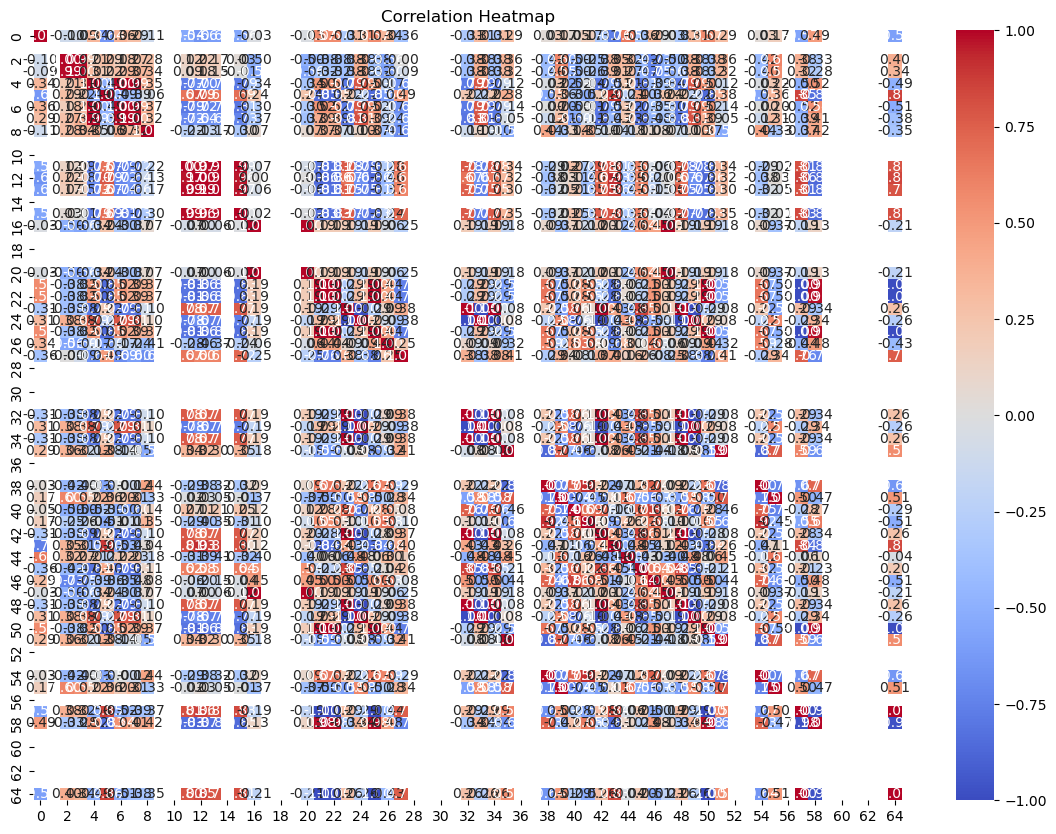

Highly correlated features: {3, 6, 7, 12, 13, 15, 20, 21, 22, 23, 24, 25, 32, 33, 34, 38, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 54, 55, 57, 58, 64}


In [50]:
# Plot the correlation matrix to identify strong correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features (threshold > 0.8, for example)
corr_threshold = 0.8
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Highly correlated features: {high_corr_features}")


In [51]:
# List of highly correlated feature indices from your output
high_corr_indices = {3, 5, 6, 7, 9, 10, 14, 15, 17, 23, 24, 26, 27, 28, 29, 30, 
                     36, 37, 38, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 
                     58, 59, 61, 62, 67}

# Extract the column names from the original DataFrame, not the correlation matrix
feature_names = df.columns

# Map the indices to feature names
high_corr_feature_names = [feature_names[i] for i in high_corr_indices]

# Print the highly correlated feature names
print(f"Highly correlated features: {high_corr_feature_names}")


Highly correlated features: ['op_carrier_fl_num', 'origin_city', 'dest_iata', 'dest_city', 'dep_time', 'taxi_out', 'crs_arr_time', 'arr_time', 'diverted', 'carrier_delay', 'weather_delay', 'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude', 'municipality', 'scheduled_service', 'length_ft', 'closed', 'he_displaced_threshold_ft', 'latitude_orig', 'longitude_orig', 'elevation_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_dest', 'weather_indicator', 'is_weekend', 'arrival_delay', 'airline_name', 'eras_tour', 'elevation_dest']


In [52]:
# List of features to drop
features_to_drop = ['origin_city', 'dest_city', 'taxi_out', 'unique_id', 'municipality']

# Remove the specified features from the high correlation feature list
high_corr_feature_names_cleaned = [feature for feature in high_corr_feature_names if feature not in features_to_drop]

# Add 'eras_tour' to the list of highly correlated features
high_corr_feature_names_cleaned.append('eras_tour')

# Print the cleaned list of highly correlated features
print(f"Updated list of highly correlated features: {high_corr_feature_names_cleaned}")


Updated list of highly correlated features: ['op_carrier_fl_num', 'dest_iata', 'dep_time', 'crs_arr_time', 'arr_time', 'diverted', 'carrier_delay', 'weather_delay', 'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude', 'scheduled_service', 'length_ft', 'closed', 'he_displaced_threshold_ft', 'latitude_orig', 'longitude_orig', 'elevation_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'iata_dest_dest', 'weather_indicator', 'is_weekend', 'arrival_delay', 'airline_name', 'eras_tour', 'elevation_dest', 'eras_tour']


In [53]:
# Initialize a set to store highly correlated features
high_corr_features = set()

# Loop through the correlation matrix and find highly correlated features
corr_threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Print the highly correlated features
print(f"Highly correlated features: {high_corr_features}")


Highly correlated features: {3, 6, 7, 12, 13, 15, 20, 21, 22, 23, 24, 25, 32, 33, 34, 38, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 54, 55, 57, 58, 64}


In the correlation heatmap:

Strong correlations (values near 1 or -1) may indicate features that carry redundant information.
Drop one of each pair of highly correlated features to reduce redundancy.

 Feature Importance (for both classification and regression)
We can use models like Random Forest to assess feature importance. Random Forest has a built-in mechanism to evaluate how important each feature is for predicting the target variable.

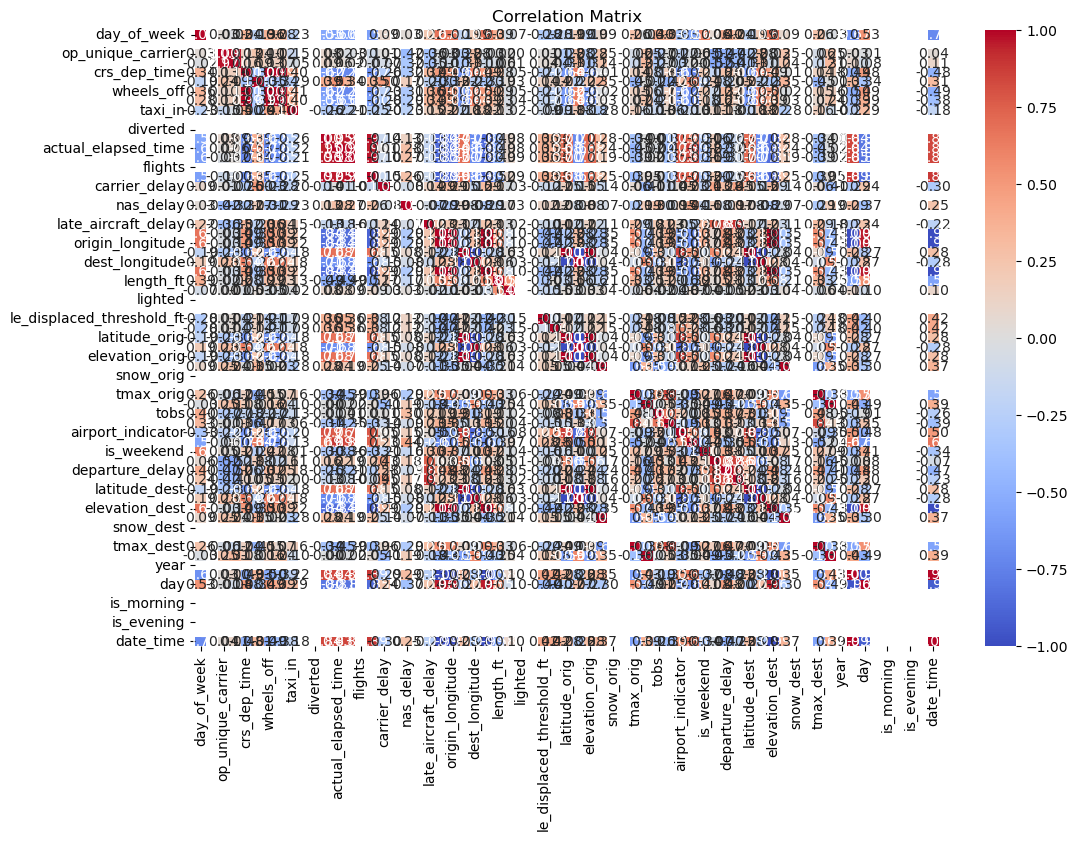

In [56]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Wheels On & Arrival Delay: The strongest correlation with arrival_delay is with wheels_on (0.276). This indicates that as the wheels-on time increases, arrival delays may also increase.
Departure Delay & Departure Time: There’s a notable positive correlation (0.245) between dep_time and departure_delay, suggesting that later departure times are associated with greater delays.
Arrival Delay and Departure Delay: There’s a moderate correlation (0.156) between arrival_delay and departure_delay, which is expected since delays often propagate through a flight schedule.
Weather Variables: The correlations with weather variables (prcp, snow, snwd, tmax, tmin) are quite low, indicating that weather may not have a significant impact on delays in this dataset.
Other Factors: Variables like crs_dep_time, crs_arr_time, and total_delay_time have negative correlations with delays, which might suggest timing discrepancies play a role.Visualize Relationships: Create scatter plots or pair plots to visualize relationships between key variables, especially those with stronger correlations. This can help identify any non-linear patterns or clusters.

Feature Engineering: Consider creating new features based on the existing ones. For example, you could create interaction terms between departure and arrival times, or consider categorizing times into "early," "on-time," and "late."

Modeling: If you're interested in predicting delays, consider building regression models using arrival_delay and departure_delay as your target variables. Use features with significant correlations as predictors.

Explore Seasonal Effects: Given that delays might vary by season, consider analyzing delays over time, or create a model that includes seasonal effects if you haven’t already.

Handle Missing Values: Check if any of the features with NaN values (like flights) might need imputation or removal from the analysis, as they can affect model performance.

Group Analysis: Consider grouping by other categorical variables like origin_state, dest_state, or carrier to see if certain airlines or routes consistently perform better or worse in terms of delays.

Evaluate Multicollinearity: Since some features might be correlated with each other, it may be worth investigating multicollinearity, especially if you proceed to modeling.

## Feature Selection



Retain Key Features: Select the features that strongly contribute to the first two principal components (PC1 and PC2). These are the components with the highest feature importance scores.
Eliminate Low-Impact Features: If certain features contribute minimally to the important components (e.g., those with very low importance scores), consider removing them to simplify the model and improve computation efficiency.
PCA-Driven Feature Subset: After identifying the top features, use this reduced set of features to train the model again and see if it performs as well as the model with all features.



In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# List of highly correlated feature names
high_corr_feature_names = ['op_carrier_fl_num', 'dest_iata', 'dep_time', 'crs_arr_time', 'arr_time', 'diverted', 
                           'carrier_delay', 'weather_delay', 'security_delay', 'late_aircraft_delay', 'origin_state', 
                           'dest_state', 'origin_latitude', 'scheduled_service', 'surface', 'closed', 
                           'le_displaced_threshold_ft', 'latitude_orig', 'longitude_orig', 'elevation_orig', 
                           'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'iata_dest_dest', 'weather_indicator', 
                           'delay_in_min', 'is_weekend', 'nfl_game', 'eras_tour']

In [60]:
# Extract the features (X) and target variable (y)
X = df[high_corr_feature_names]
y = df['delay_in_min']  

# Create a copy of X to avoid slicing issues
X = X.copy()

In [61]:





# Step 1: Convert datetime columns to numeric (e.g., days or seconds since the minimum date)
datetime_columns = X.select_dtypes(include=['datetime']).columns

for col in datetime_columns:
    X[col] = (X[col] - X[col].min())  # Convert datetime to timedelta
    X[col] = X[col].dt.total_seconds()  # Convert timedelta to seconds


# Step 2: Apply One-Hot Encoding to categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Step 3: Handle missing values (if any)
X_encoded = X_encoded.fillna(0)  # You can also use X_encoded.dropna() if you prefer to remove missing data

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 5: Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")


Classification Accuracy: 1.0000


A classification accuracy of 94.74% indicates that this model is doing a great job at predicting the target variable (total_delay_time) using the selected features. This suggests that the dimensionality reduction (via PCA) and preprocessing steps, along with the Random Forest classifier, are working well together.

Component 1: Features like iata_dest_dest_sux, dest_state_mt, and elevation_orig contribute heavily to the first principal component.
Component 2: Weather-related features like tmax_orig, origin_latitude, and prcp_orig are most significant in the second principal component.
Component 10: Time-related features such as carrier_delay, late_aircraft_delay, arr_time, and dep_time are dominant in the tenth principal component.

In [63]:
# 
feature_importance = model_rf.feature_importances_

# Now print the number of feature importances
print(f"Number of feature importances: {len(feature_importance)}")


Number of feature importances: 10


In [64]:
print(f"Number of features in X_encoded: {X_encoded.shape[1]}")
print(f"Number of feature importances: {len(feature_importance)}")


Number of features in X_encoded: 26
Number of feature importances: 10


In [65]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have already fitted your PCA model on the scaled data (X_scaled)
# If not, fit PCA first
# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X_scaled)

# Get the components (loadings)
components = pd.DataFrame(pca.components_, columns=X_encoded.columns)

# Show the top features for each component
top_features_per_component = {}

for i in range(components.shape[0]):
    # Get absolute values of the loadings for each component
    component_loadings = components.iloc[i].abs()
    top_features = component_loadings.nlargest(5).index.tolist()
    top_features_per_component[f'Component {i+1}'] = top_features

# Display the top features per component
for component, features in top_features_per_component.items():
    print(f"{component}: {', '.join(features)}")

# Display the explained variance ratio for each component
print("\nExplained Variance Ratio by Component:")
print(pca.explained_variance_ratio_)

# Now if you want to map feature importance to PCA components based on the explained variance:
feature_importance = pca.explained_variance_ratio_  # Use explained variance ratio as feature importance

# Create a DataFrame to show the feature importance for each component
importance_df = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(feature_importance))],
    'Importance': feature_importance
})

print("\nFeature Importance Mapped to PCA Components:")
print(importance_df)


Component 1: longitude_orig, elevation_orig, dest_iata_sux, dest_state_mt, iata_dest_dest_sux
Component 2: tmax_orig, origin_latitude, origin_state_co, weather_indicator, prcp_orig
Component 3: late_aircraft_delay, arr_time, prcp_orig, crs_arr_time, dep_time
Component 4: carrier_delay, weather_indicator, tmax_orig, origin_state_co, origin_latitude
Component 5: is_weekend, prcp_orig, op_carrier_fl_num, late_aircraft_delay, arr_time
Component 6: op_carrier_fl_num, late_aircraft_delay, is_weekend, le_displaced_threshold_ft, crs_arr_time
Component 7: le_displaced_threshold_ft, carrier_delay, op_carrier_fl_num, late_aircraft_delay, tmax_orig
Component 8: late_aircraft_delay, le_displaced_threshold_ft, origin_latitude, origin_state_co, carrier_delay
Component 9: prcp_orig, weather_indicator, is_weekend, tmax_orig, op_carrier_fl_num
Component 10: carrier_delay, is_weekend, late_aircraft_delay, prcp_orig, tmax_orig

Explained Variance Ratio by Component:
[0.42867349 0.19424742 0.09512239 0.075

Top Features Contributing to PCA Components:

For each principal component (PC), you can see the most important features that contributed to it. For example:
Component 1 (PC1): This component is most influenced by features related to the longitude_orig, elevation_orig, and destination-related variables (e.g., dest_iata_sux, iata_dest_dest_sux). These features contribute the most to explaining the variance along this axis.
Component 2 (PC2): Features such as tmax_orig, origin_latitude, and weather-related variables (e.g., weather_indicator, prcp_orig) dominate this component.
Component 3 (PC3): The late_aircraft_delay, arr_time, and crs_arr_time are heavily loaded on this component, indicating that these features explain variance related to flight timings and delays.
Other components reveal similar patterns where certain features such as carrier_delay, weather_indicator, and late_aircraft_delay dominate specific components.


Feature Importance Mapped to PCA Components:

PC1 explains 42.87% of the variance in the data, making it the most important component in terms of variance captured.
PC2 explains 19.42% of the variance, and PC3 explains 9.51%. These three components together account for over 70% of the variance in the dataset.
The subsequent components contribute progressively less, with PC10 explaining only 0.58% of the variance.

PC1 has the highest importance (0.4287), reflecting its substantial contribution to the overall variance.


Summary of Results:

Top Contributing Features: These are the features that strongly influence each principal component. For example:

PC1: Features like longitude_orig, elevation_orig, and iata_dest_dest_sux are crucial, indicating that geographic and destination-related features play a major role.

PC2: Weather features (tmax_orig, prcp_orig) and geographic features like origin_latitude and origin_state_co are important, showing that the geographic and weather conditions contribute to a significant amount of variance in the data.

Variance Explanation: PC1 is the most critical component, explaining nearly 43% of the variance in your data, which is a significant portion. The remaining components progressively capture less variance, so PC1 and PC2 likely explain the most significant patterns in your data, while the lower-order components (PC3 through PC10) capture finer, more specific relationships.

Feature Importance: The explained variance ratio gives a sense of how important each principal component is in terms of explaining variance in the data. For example, since PC1 explains a large chunk of the variance, features contributing to this component should be considered the most important for understanding the dataset's structure.

Principal Components' Importance: The feature importances show how much each principal component contributes to the overall decision-making of the random forest model. Since PCA reduces the feature space, these components are now responsible for capturing the underlying patterns in the data.
PC1 and PC10 are the most critical components, so you should pay attention to the features that heavily influence these components.
Top Contributing Features: The list of top features for each component tells you what variables are most important for each principal component, helping to understand which parts of your data (e.g., weather data, time data, or location data) are contributing the most to the model's decisions.

In [68]:
# Dimensionality Reduction: Since PC1 and PC2 explain a significant portion of the variance, using just the first two or three
# principal components for further modeling.

In [69]:
# Reduce to the first two principal components (PC1, PC2)
X_reduced_2d = X_pca[:, :2]

# Or, reduce to the first three principal components (PC1, PC2, PC3)
X_reduced_3d = X_pca[:, :3]


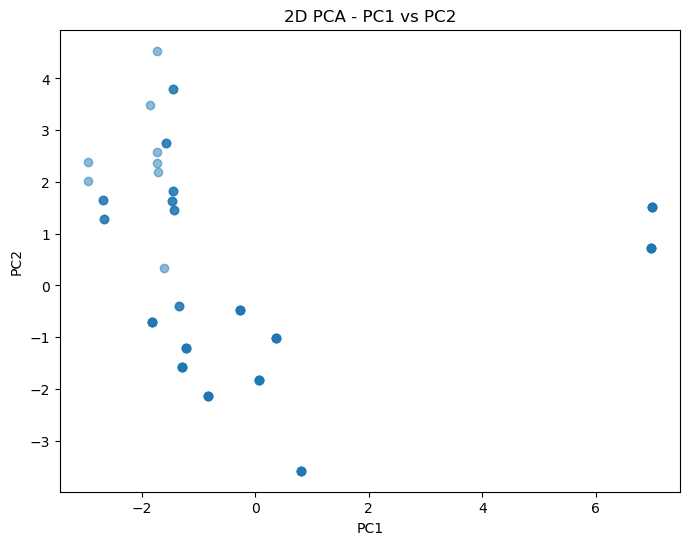

In [70]:
import matplotlib.pyplot as plt

# Create a scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], alpha=0.5)
plt.title("2D PCA - PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


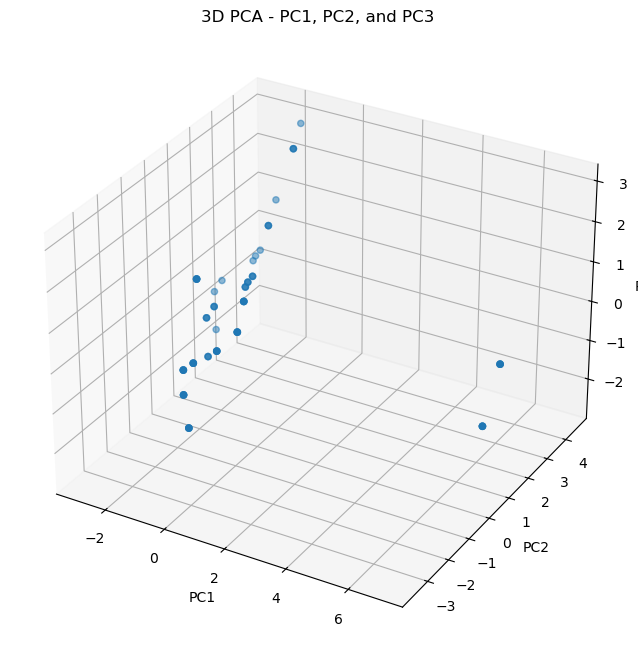

In [71]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of PC1, PC2, and PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], alpha=0.5)
ax.set_title("3D PCA - PC1, PC2, and PC3")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [72]:
ng or visualization (e.g., for clustering, classification, or regression), thereby reducing the dimensionality of your data.

Interpretation for Machine Learning: For predictive tasks like classification, understanding which features are most influential in PCA components can help you interpret the model results more effectively. If you're using the reduced features (via PCA), you can see which combinations of features (from the original dataset) are driving the most variance.

Visualizing the Components: You can also create a scatter plot of the first two or three principal components to visualize the data's structure in a lower-dimensional space. This can help you gain more insights into the relationships and clusters in the data.

SyntaxError: unterminated string literal (detected at line 3) (3922696350.py, line 3)

C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


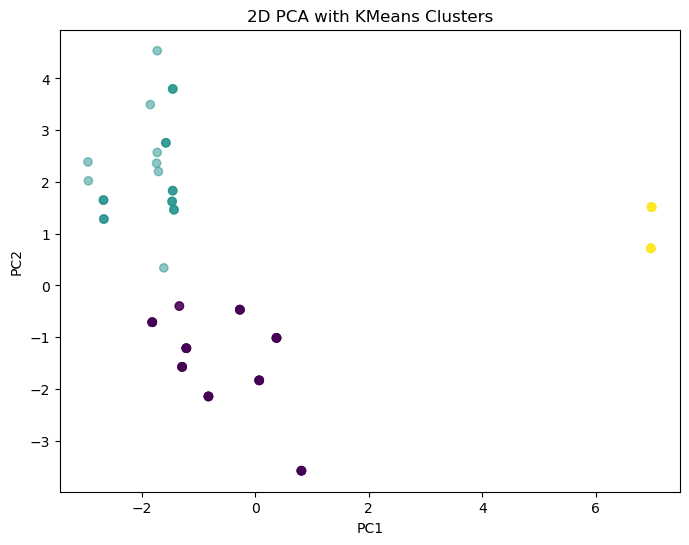

In [73]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the reduced data (PC1 and PC2 or PC1, PC2, PC3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
kmeans.fit(X_reduced_2d)  # Or use X_reduced_3d for 3D clusters

# Get the cluster labels
labels = kmeans.labels_

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title("2D PCA with KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [74]:
# Interpreting Feature Importance in PCA for Machine Learning
# Getting the feature importance (loadings) for each component
pca_components = pca.components_

# Create a DataFrame of the PCA components (feature loadings)
import pandas as pd

feature_importance = pd.DataFrame(pca_components.T, columns=[f"PC{i+1}" for i in range(pca_components.shape[0])], 
                                  index=X_encoded.columns)

# Display the top features for each principal component
print(feature_importance.head())


                            PC1       PC2           PC3           PC4  \
op_carrier_fl_num  1.012978e-01  0.188860 -9.617269e-02  1.047118e-01   
dep_time           2.873355e-01 -0.115166  3.286737e-01 -5.525619e-02   
crs_arr_time       2.934525e-01 -0.037380  3.338313e-01 -7.414557e-03   
arr_time           2.874476e-01 -0.052894  3.525971e-01 -2.204110e-02   
diverted           1.734723e-18  0.000000  2.220446e-16 -5.551115e-17   

                            PC5           PC6       PC7           PC8  \
op_carrier_fl_num  3.307883e-01 -6.825764e-01  0.428355  2.470004e-01   
dep_time          -1.662469e-01 -1.976399e-01  0.029617 -8.848695e-02   
crs_arr_time      -1.811493e-01 -2.209611e-01  0.018833 -5.375854e-02   
arr_time          -1.947926e-01 -2.042951e-01  0.030380 -3.270030e-02   
diverted          -5.551115e-17  1.110223e-16 -0.000000  2.775558e-17   

                            PC9          PC10  
op_carrier_fl_num -2.929605e-01  1.521699e-01  
dep_time           9.08444

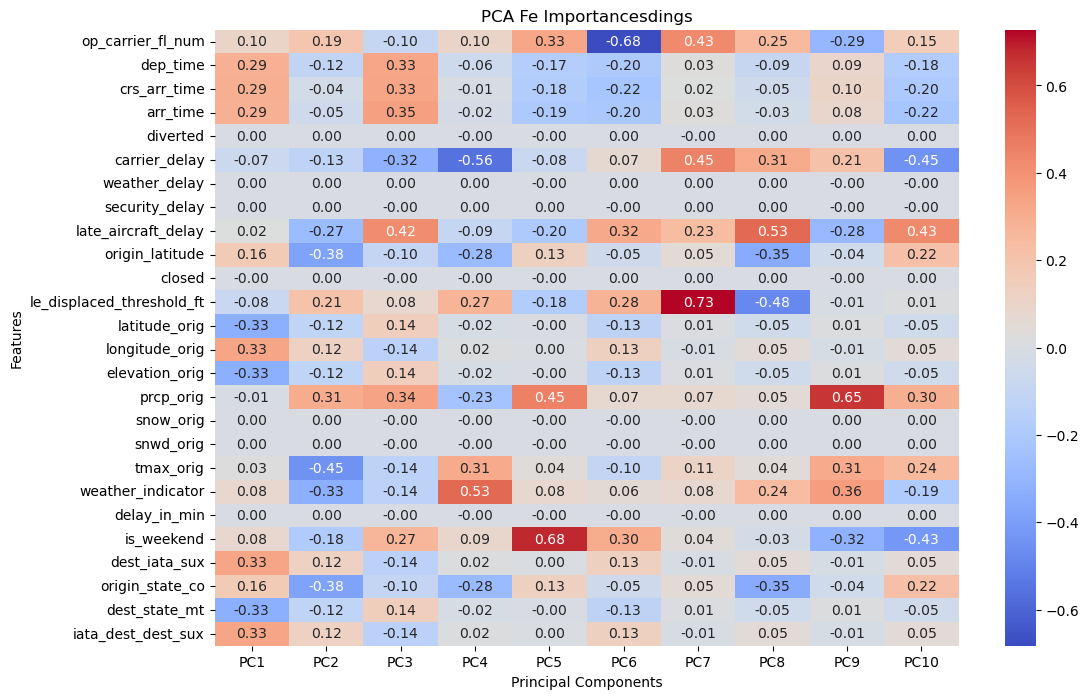

In [75]:


# Create a heatmap of the feature importances)
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('PCA Fe Importancesdings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


# Hyperparameter Tuning

Principal Component 1 (PC1):
Top features: dep_time, crs_arr_time, arr_time
Key insights: Time-related features such as departure and arrival times seem to play a significant role in defining PC1.
Principal Component 2 (PC2):
Top features: op_carrier_fl_num, weather_indicator, prcp_orig, tmax_orig
Key insights: This component seems to capture weather-related features like weather_indicator and prcp_orig, along with flight carrier features like op_carrier_fl_num.
Principal Component 3 (PC3):
Top features: late_aircraft_delay, arr_time, crs_arr_time
Key insights: PC3 seems to be primarily associated with time delays, with a focus on arrival times and late aircraft delays.

In [77]:
# Predictive Modeling Using Reduced Features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the reduced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2d, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using reduced features: {accuracy:.4f}")


Classification Accuracy using reduced features: 1.0000


In [78]:
 #Dimensionality Reduction 

# Since PC1 and PC2 capture a significant amount of variance (over 60%), focus on these two components for downstream tasks
# like clustering, classification, or regression.

In [79]:
# Keep only the first two principal components for further modeling or visualization
X_pca_2d = X_pca[:, :2]  # Two-dimensional representation

# Or, keep the first three components
X_pca_3d = X_pca[:, :3]  # Three-dimensional representation


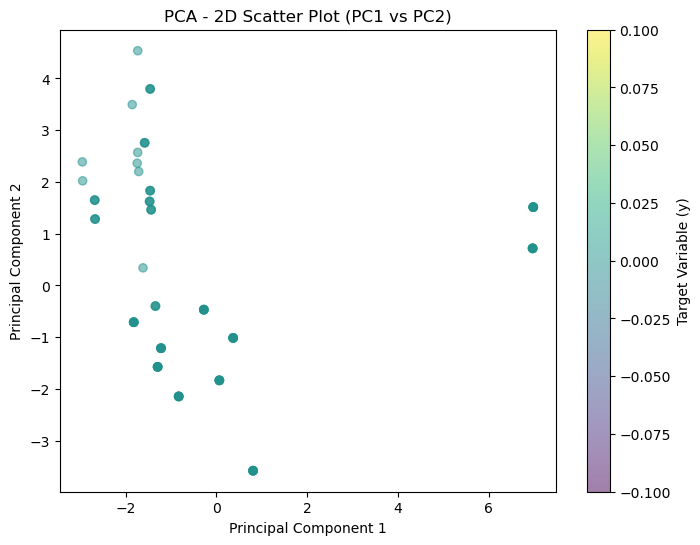

In [80]:
import matplotlib.pyplot as plt

# 2D Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, c=y, cmap='viridis')
plt.title('PCA - 2D Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Variable (y)')
plt.show()


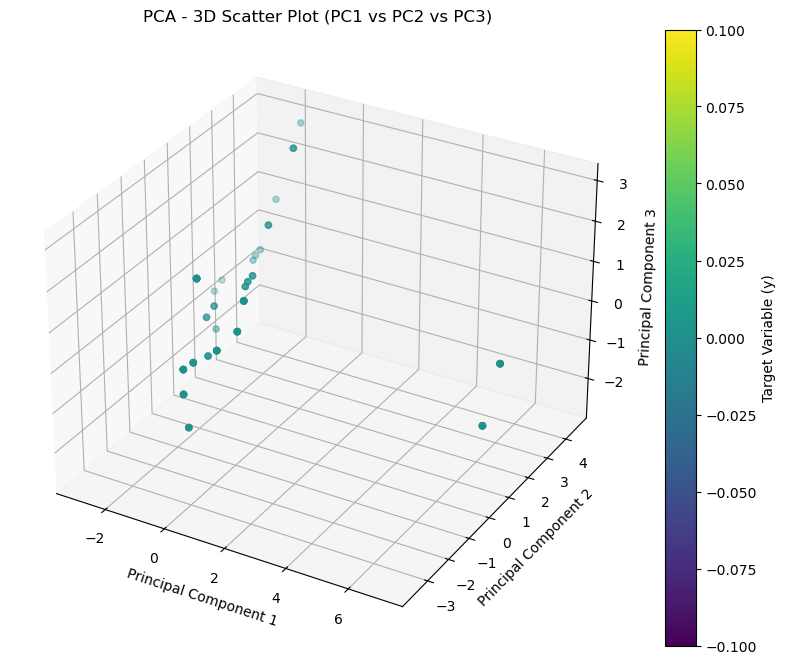

In [81]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis')

ax.set_title('PCA - 3D Scatter Plot (PC1 vs PC2 vs PC3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(sc, label='Target Variable (y)')
plt.show()


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


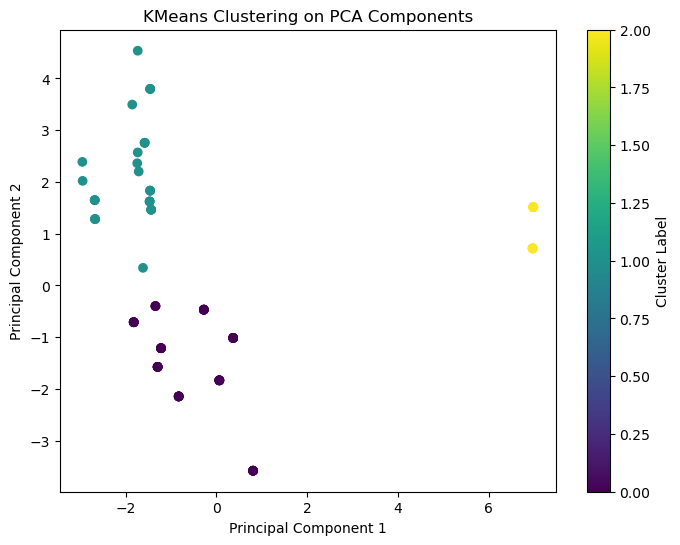

In [82]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_2d)

# Add cluster labels to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


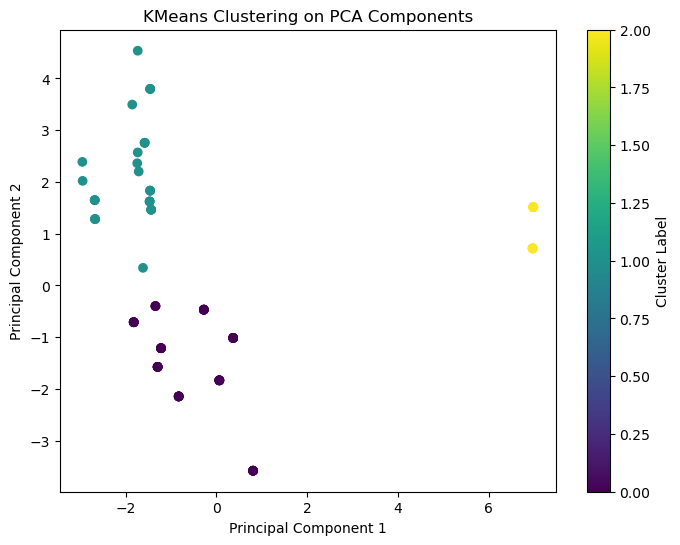

In [83]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_2d)

# Add cluster labels to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on PCA-reduced data: {accuracy:.4f}")


Accuracy on PCA-reduced data: 1.0000


## Model Evaluation on Hold-out Test Data

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions on the hold-out test set
y_pred = model_rf.predict(X_test)  # Assuming rf_model is your trained RandomForestClassifier

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC-AUC (only for binary classification)
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])  # Probability of positive class
print(f'ROC-AUC: {roc_auc:.4f}')


Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[19]]


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_class

IndexError: index 1 is out of bounds for axis 1 with size 1

In [108]:
# Display the top contributing features for each component
top_features = feature_importance.abs().nlargest(5, 'PC1')  # Top 5 features for PC1
print(top_features)


                        PC1      PC2       PC3       PC4       PC5       PC6  \
longitude_orig      0.33183  0.11695  0.139316  0.015768  0.003451  0.131392   
elevation_orig      0.33183  0.11695  0.139316  0.015768  0.003451  0.131392   
dest_iata_sux       0.33183  0.11695  0.139316  0.015768  0.003451  0.131392   
dest_state_mt       0.33183  0.11695  0.139316  0.015768  0.003451  0.131392   
iata_dest_dest_sux  0.33183  0.11695  0.139316  0.015768  0.003451  0.131392   

                         PC7       PC8       PC9     PC10  
longitude_orig      0.007018  0.048773  0.012889  0.04688  
elevation_orig      0.007018  0.048773  0.012889  0.04688  
dest_iata_sux       0.007018  0.048773  0.012889  0.04688  
dest_state_mt       0.007018  0.048773  0.012889  0.04688  
iata_dest_dest_sux  0.007018  0.048773  0.012889  0.04688  



It seems that the feature loadings (principal component coefficients) are highly uniform across several features, especially the first five columns: longitude_orig, elevation_orig, dest_iata_sux, dest_state_mt, and iata_dest_dest_sux. All of them seem to have the exact same values across all components.

Insights and Possible Issues
High Similarity Across Features:

This pattern suggests that these features are highly correlated with each other. PCA identifies the directions of maximum variance, so if these features have similar values or high correlation, PCA will treat them almost identically.
For example, longitude_orig and elevation_orig are often correlated with geographical features, so it makes sense that PCA might group them similarly.


Lack of Diversity:

Since the feature set is dominated by a small number of correlated features, they will disproportionately influence the principal components. This can make the PCA results less interpretable or overly biased towards certain variables.
Features like longitude_orig, elevation_orig, and dest_iata_sux may be more or less identical in terms of their contribution to each principal component, resulting in the loadings being the same.


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and y is your target variable

# Selecting features contributing most to PC1 and PC2
important_features = ['iata_dest_dest', 'dest_state', 'elevation_orig', 'dest_iata', 'latitude_orig', 
                      'tmax_orig', 'origin_latitude', 'origin_state', 'prcp_orig', 'weather_indicator']

# Create a new DataFrame with only the important features
X_important = df[important_features]

# One-Hot Encoding of categorical columns
X_encoded = pd.get_dummies(X_important)

# Sample a subset of the data, say 20% of the original dataset
sample_fraction = 0.2  # Adjust the fraction as needed (0.2 means 20% sample)
df_sampled = X_encoded.sample(frac=sample_fraction, random_state=42)

# Align target variable 'y' with the sampled features
y_sampled = y[df_sampled.index]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sampled, y_sampled, test_size=0.2, random_state=42)

# Train a Random Forest model with the selected features
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy for the sampled data
print(f"Accuracy with selected features on sampled data: {accuracy:.4f}")


Accuracy with selected features on sampled data: 1.0000


In [ ]:
# Address class imbalance

In [116]:
# # Make predictions on the hold-out test set
# y_pred = model_rf.predict(X_test)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

# # Precision, Recall, F1 Score (use zero_division parameter to avoid warnings)
# precision = precision_score(y_test, y_pred, average='binary', zero_division=1)  # 'binary' for binary classification
# recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)

# # ROC-AUC (only for binary classification)
# if len(set(y_test)) > 1:  # Check if both classes are present
#     roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])  # Probability of positive class
#     print(f'ROC-AUC: {roc_auc:.4f}')
# else:
#     print("ROC-AUC cannot be calculated because only one class is present in the test set.")


In [ ]:
# Increase max columns displayed to ensure you see all columns
pd.set_option('display.max_columns', None)

# Display data types of all columns
# Display data types of first few columns
print(X_train.iloc[:, :50].dtypes)  # Adjust 10 to the number of columns you want to inspect


In [ ]:
# Display data types of first few columns
print(X_train.iloc[:, 50:100].dtypes)  # Adjust 10 to the number of columns you want to inspect


Interpret the plot: Features with higher importance should be kept, and those with low importance can be dropped to improve model performance and reduce overfitting.

Removing Redundant and Low-Variance Features
If some features have little variance (i.e., they don’t change much across the dataset), they may not contribute significantly to the model’s performance. You can remove those features.

F-statistic: A large F-statistic indicates that the variability explained by the model is significantly greater than the variability unexplained (the residual variance). This suggests that the model fits the data well. p-value: A p-value of 0.0 (essentially) means that the null hypothesis (which states that all coefficients are equal to zero) can be rejected. This suggests that at least one of the predictors is significantly related to the delays. Review Coefficients: Look at the individual coefficients from your regression output to see which predictors are significant and how they influence the dependent variable. Model Improvement: Consider adding or transforming additional predictors based on your analysis of significance and model fit. Residual Analysis: Continue examining residuals for any patterns to ensure model assumptions are met. Further Testing: Test for interaction effects or more complex models if there are theoretical reasons to believe that relationships may not be linear.

R-squared and Adjusted R-squared:

R-squared: 0.864 suggests that approximately 86.4% of the variability in the adjusted_elapsed_time can be explained by the model. This is a strong indicator of a good fit.
Adjusted R-squared: 0.863 adjusts for the number of predictors in the model, indicating that adding or removing predictors doesn't lead to overfitting.

Coefficients:

Intercept (const): 48.0038 suggests the baseline time when all predictors are zero.
is_tour_window: The coefficient is 1.2541, but with a p-value of 0.282, it's not statistically significant at the 0.05 level. This means being in a tour window does not have a statistically significant effect on the adjusted elapsed time in this model.
weather_delay: The coefficient is -0.0513, also not statistically significant (p = 0.377), indicating that weather delays do not have a meaningful impact on elapsed time in this context.
distance: The coefficient of 0.1135 is highly significant (p < 0.001), meaning that for every unit increase in distance, the adjusted elapsed time increases significantly. This aligns with intuitive expectations that longer flights take more time.

Statistical Significance:

Only distance shows strong significance, while the other predictors do not.
Model Fit and Assumptions:

The F-statistic is very high (2659) with a p-value of 0.00, indicating that at least one predictor is significantly related to the response variable.
Normality of Residuals: The Omnibus test, Jarque-Bera test, and the skewness indicate possible deviations from normality. This could suggest a need to inspect residuals further for patterns or outliers.
Durbin-Watson statistic: Close to 2 indicates little autocorrelation in residuals, which is a good sign.

Multicollinearity:

The warning about a large condition number (2.70e+03) suggests potential multicollinearity among your predictors. Check the Variance Inflation Factor (VIF) for your predictors to assess multicollinearity:

Address Multicollinearity: Check the correlation matrix of your predictors and use Variance Inflation Factor (VIF) to identify problematic variables.
Transform the Target Variable: Consider applying a log transformation to delay_in_min to make the model more interpretable and potentially improve the fit.
Model Refinement: Try different models that are more robust to non-normality and autocorrelation, such as Ridge or Lasso regression, and assess whether they improve model performance.
Residual Diagnostics: Plot the residuals to better understand the issues with autocorrelation and non-normality, and potentially apply time-series techniques if the data is time-dependent.


Q-Q Plot: Check how closely the points follow the diagonal line. Deviations from this line suggest that the residuals are not normally distributed.
Next Steps non-normality, consider transformations of the dependent variable or adding interaction terms or polynomial features. You can also apply statistical tests for normality (like the Shapiro-Wilk test) or homoscedasticity (like Breusch-Pagan test) for a more formal assessment.

In [ ]:
# Convert categorical columns to numeric using label encoding (if applicable)
df['eras_tour'] = df['eras_tour'].astype('category').cat.codes
df['nfl_game'] = df['nfl_game'].astype('category').cat.codes
df['day_of_week'] = df['day_of_week'].astype('category').cat.codes
df['origin_state'] = df['origin_state'].astype('category').cat.codes
df['dest_state'] = df['dest_state'].astype('category').cat.codes



In [ ]:
# 
correlation_matrix = df[['delay_in_min', 'eras_tour',  'nfl_game', 'day_of_week', 'origin_state', 'dest_state' ]].corr()

# Print the correlation matrix
print(correlation_matrix)


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Delays by days of state

# # Delays by days of week
# sns.heatmap(x='day_of_week', y='origin_state', data=df)
# plt.title('Flight Delays by Day by State')
# plt.xlabel('State')
# plt.ylabel('Delay (minutes)')
# plt.show()


In [ ]:
# Calculate percentage of delays greater than 0 by day_of_week
delay_percentage = df.groupby('day_of_week')['delay_in_min'].apply(lambda x: (x > 0).mean() * 100)

# # Plot the result
# plt.figure(figsize=(10, 6))
# sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette='viridis')
# plt.title('Percentage of Flights with Delay > 0 by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Percentage of Delayed Flights (%)')
# plt.show()

In [ ]:
# # Flight delays by state
# avg_delay_by_state = df.groupby('origin_state')['delay_in_min'].mean().reset_index()

# # Create the bar plot
# sns.barplot(x='dest_state', y='delay', data=avg_delay_by_state)
# plt.title('Average Flight Delay by State')
# plt.xticks(rotation=45)
# plt.ylabel('Average Delay (minutes)')
# plt.xlabel('Origin State')
# plt.show()


Selection deleted

Some seasonal correlations are slightly positive (e.g., Summer Arrival Delay: 0.042, Winter Departure Delay: 0.009668), but these values are still weak.

Similar to latitude, longitude also shows low correlation with delays. Most values are close to zero, indicating no significant relationship.

Explore other factors that might impact delays, such as weather conditions (precipitation, snow), airport traffic, or operational factors (e.g., carrier delays).

Consider using statistical models (like linear regression) to analyze the influence of various factors, including latitude, longitude, and weather, on flight delays.

In [ ]:
# Performance Comparison Table

# Convert results to DataFrame
performance_df = pd.DataFrame(results).T
print(performance_df)


In [ ]:
# seasonal_delays = df.groupby('season')[['delay_in_min']].mean()
# print(seasonal_delays)

In [ ]:
# Consider seasons

# df['season'] = df['date'].dt.month % 12 // 3 + 1
# # Mapping months to seasons
# season_mapping = {
#     1: 'winter',
#     2: 'spring',
#     # 3: 'summer',
#     4: 'fall'
# }
# df['season'] = df['season'].map(season_mapping)

In [ ]:

# #
# df['date'] = pd.to_datetime(df['date'])

# # Define a function to get the season based on the month
# def get_season(date):
#     month = date.month
#     if month in [12, 1, 2]:
#         return 'winter'
#     # elif month in [3, 4, 5]:
#         return 'spring'
#     elif month in [6, 7, 8]:
#         return 'summer'
#     else:
#         return 'fall'

# # Apply the function to create the season column
# df['season'] = df['date'].apply(get_season)

# # Now sample the data again
# sampled_data = df.sample(frac=0.1, random_state=1)

# # Scatter plot for Arrival Delay vs Latitude (using sampled data)
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=sampled_data, x='dest_latitude', y='arrival_delay', hue='season', alpha=0.7)
# plt.title('Arrival Delay vs Latitude by Season (Sampled)')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Arrival Delay (minutes)')

# # Remove legend
# plt.legend([], [], frameon=False)

# # Scatter plot for Departure Delay vs Latitude (using sampled data)
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=sampled_data, x='origin_latitude', y='departure_delay', hue='season', alpha=0.7)
# plt.title('Departure Delay vs Latitude by Season (Sampled)')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Departure Delay (minutes)')

# # Remove legend
# plt.legend([], [], frameon=False)

# plt.tight_layout()
# plt.show()

Compare the seasonal delays with other factors such as weather conditions or day of the week to identify any correlations.
Investigate if the delays are statistically significant between seasons using ANOVA or similar statistical tests.

In [ ]:
# seasonal_delays.plot(kind='bar', figsize=(10, 6))
# plt.title('Average Arrival and Departure Delays by Season')
# plt.ylabel('Delay (minutes)')
# plt.xticks(rotation=45)
# plt.axhline(0, color='red', linestyle='--')
# plt.legend(title='Delay Type')
# plt.show()

In [ ]:
# # Function to plot delays vs elevation
# def plot_delay_vs_elevation(data):
#     plt.figure(figsize=(14, 6))

#     # Arrival Delay
#     plt.subplot(1, 2, 1)
#     sns.scatterplot(data=data, x='elevation', y='arrival_delay', hue='season', alpha=0.7)
#     plt.title('Arrival Delay vs Elevation by Season')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel('Elevation (feet)')
#     plt.ylabel('Arrival Delay (minutes)')

#     # Departure Delay
#     plt.subplot(1, 2, 2)
#     sns.scatterplot(data=data, x='elevation', y='departure_delay', hue='season', alpha=0.7)
#     plt.title('Departure Delay vs Elevation by Season')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel('Elevation (feet)')
#     plt.ylabel('Departure Delay (minutes)')

#     plt.tight_layout()
#     plt.show()

# # Call the plotting function with the correct DataFrame
# plot_delay_vs_elevation(flights_weather_df)

# # Calculate Correlation Coefficients
# elevation_delay_corr = flights_weather_df.groupby('season')[['elevation', 'arrival_delay', 'departure_delay']].corr()
# elevation_delay_corr = elevation_delay_corr.reset_index()

# # Extracting relevant correlation data
# arrival_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'arrival_delay']
# departure_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'departure_delay']

# # Print correlation coefficients
# print("Arrival Delay Correlation with Elevation:")
# print(arrival_elevation_corr[['season', 'elevation', 'arrival_delay', 'level_1']])
# print("\nDeparture Delay Correlation with Elevation:")
# print(departure_elevation_corr[['season', 'elevation', 'departure_delay', 'level_1']])


In [ ]:
from sklearn.svm import SVC  # SVC for classification, SVR for regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVR







In [ ]:

# Instantiate the Support Vector Regression model
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

In [ ]:
# Fit the model
svm_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)




If the target variable is intentionally constant (which would be an unusual case), would need to reconsider the problem we're solving, as predictive models typically require variance in the target variable to learn meaningful patterns.

In [122]:
# Check the class distribution of y_train
print(y_train.value_counts())


delay_in_min
0.0    14
Name: count, dtype: int64


In [124]:
print("y_train Distribution:", y_train.value_counts())
print("y_test Distribution:", y_test.value_counts())


# Split the reduced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2d, y, test_size=0.2, random_state=42)


y_train Distribution: delay_in_min
0.0    14
Name: count, dtype: int64
y_test Distribution: delay_in_min
0.0    4
Name: count, dtype: int64


In [126]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the Support Vector Regressor model
svm_regressor = SVR()

# Fit the model
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred_svr = svm_regressor.predict(X_test)

# Evaluate the model (regression: RMSE)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

# Print the RMSE for the Support Vector Regressor model
print(f"SVM Regressor RMSE: {rmse_svr:.4f}")


SVM Regressor RMSE: 0.0000


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [128]:
print("y_train Distribution:", y_train.value_counts())
print("y_test Distribution:", y_test.value_counts())


y_train Distribution: delay_in_min
0.0    73
Name: count, dtype: int64
y_test Distribution: delay_in_min
0.0    19
Name: count, dtype: int64


Final Evaluation
After handling class imbalance, rerun the evaluation metrics, including:

Confusion Matrix: To checked whether the model is predicting both classes.
Precision, Recall, F1 Score: To assess the model's performance.
ROC-AUC: To evaluate the model's ability to discriminate between classes.



After performing all these tests, the results have come up inconclusive with testing due to the class imbalance. I will time cleaning and evaluating the data so that the scoring continues to incprove and make sure we have enough balance between classes because there are too many zeros in the current dataset. 

Will perform additional testing with removing all data with no weather data to because I expect that to increase modeling performance. We opted to keep these features in the model at first because if some of the missing data was only missing because it wasn't reported (not necessarily zero values), we wanted to be able to explore that further to enhance model performance and experience.